In [20]:
#Imports

from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras import layers
import numpy as np

In [21]:
# Load pre-shuffled MNIST data into train and test sets

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
#Exploring shape of test set

print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape) 

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


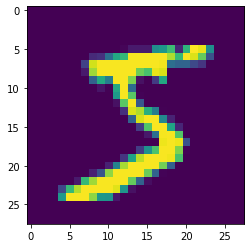

In [23]:
#Plotting the first image of training set

plt.imshow(X_train[0])

In [24]:
# reshaping the dimensions of images upto 4 as required by keras

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# See how it is rehaped

input_shape = (28, 28, 1)

# Making all the values as float to preserve decimal points after a division

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the values to be in the range of 0 - 1

X_train /= 255
X_test /= 255

print(X_train.shape) 
print(X_test.shape) 



(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [25]:
# Adding noise of 0.25

noise_factor = 0.25
X_train_noisy_25 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy_25 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy_25 = np.clip(X_train_noisy_25, 0. , 1.)
X_test_noisy_25 = np.clip(X_test_noisy_25, 0. , 1.)

# Adding noise of 0.40

noise_factor = 0.40
X_train_noisy_40 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy_40 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy_40 = np.clip(X_train_noisy_40, 0. , 1.)
X_test_noisy_40 = np.clip(X_test_noisy_40, 0. , 1.)

# Adding noise of 0.60

noise_factor = 0.60
X_train_noisy_60 = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy_60 = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy_60 = np.clip(X_train_noisy_60, 0. , 1.)
X_test_noisy_60 = np.clip(X_test_noisy_60, 0. , 1.)

In [26]:
print(y_train)

# one hot encoding train and test classes 
class_count = 10
y_train = keras.utils.to_categorical(y_train, class_count)
y_test = keras.utils.to_categorical(y_test, class_count)


[5 0 4 ... 5 6 8]


In [27]:
model_25 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(class_count, activation="softmax"),
    ]
)

model_40 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(class_count, activation="softmax"),
    ]
)

model_60 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(class_count, activation="softmax"),
    ]
)

In [28]:
batch_size = 128
epochs = 15

model_25.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_25.fit(X_train_noisy_25, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

model_40.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_40.fit(X_train_noisy_40, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

model_60.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_60.fit(X_train_noisy_60, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 50s 119ms/step - loss: 0.4658 - accuracy: 0.8602 - val_loss: 0.1109 - val_accuracy: 0.9693
Epoch 2/15
422/422 [==============================] - 48s 113ms/step - loss: 0.1517 - accuracy: 0.9539 - val_loss: 0.0800 - val_accuracy: 0.9787
Epoch 3/15
422/422 [==============================] - 52s 123ms/step - loss: 0.1145 - accuracy: 0.9650 - val_loss: 0.0670 - val_accuracy: 0.9823
Epoch 4/15
422/422 [==============================] - 47s 111ms/step - loss: 0.0962 - accuracy: 0.9704 - val_loss: 0.0599 - val_accuracy: 0.9830
Epoch 5/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0881 - accuracy: 0.9729 - val_loss: 0.0535 - val_accuracy: 0.9852
Epoch 6/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0521 - val_accuracy: 0.9853
Epoch 7/15
422/422 [==============================] - 48s 114ms/step - loss: 0.0729 - accuracy: 0.9765 - val_loss: 0.0476 - val_ac

In [29]:
score = model_25.evaluate(X_test_noisy_25, y_test, verbose=0)
print("Test loss noise 25:", score[0])
print("Test accuracy noise 25:", score[1])

score = model_40.evaluate(X_test_noisy_40, y_test, verbose=0)
print("Test loss noise 40:", score[0])
print("Test accuracy noise 40:", score[1])

score = model_60.evaluate(X_test_noisy_60, y_test, verbose=0)
print("Test loss noise 60:", score[0])
print("Test accuracy noise 60:", score[1])

Test loss noise 25: 0.037031494081020355
Test accuracy noise 25: 0.9868999719619751
Test loss noise 40: 0.06714973598718643
Test accuracy noise 40: 0.9779999852180481
Test loss noise 60: 0.1590907722711563
Test accuracy noise 60: 0.9506999850273132


In [31]:
# removed dropout layer to see whether accuracy improves

model_25_improve = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(class_count, activation="softmax"),
    ]
)

model_25_improve.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_25_improve.fit(X_train_noisy_25, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 44s 105ms/step - loss: 0.3750 - accuracy: 0.8908 - val_loss: 0.1103 - val_accuracy: 0.9700
Epoch 2/15
422/422 [==============================] - 46s 108ms/step - loss: 0.1081 - accuracy: 0.9670 - val_loss: 0.0726 - val_accuracy: 0.9793
Epoch 3/15
422/422 [==============================] - 44s 103ms/step - loss: 0.0795 - accuracy: 0.9754 - val_loss: 0.0644 - val_accuracy: 0.9808
Epoch 4/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0656 - accuracy: 0.9798 - val_loss: 0.0598 - val_accuracy: 0.9832
Epoch 5/15
422/422 [==============================] - 51s 120ms/step - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.0602 - val_accuracy: 0.9822
Epoch 6/15
422/422 [==============================] - 54s 127ms/step - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0518 - val_accuracy: 0.9858
Epoch 7/15
422/422 [==============================] - 50s 119ms/step - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.0513 - val_ac

In [32]:
score = model_25_improve.evaluate(X_test_noisy_25, y_test, verbose=0)
print("Test loss noise 25 (imporved):", score[0])
print("Test accuracy noise 25 (imporved):", score[1])

Test loss noise 25 (imporved): 0.052052032202482224
Test accuracy noise 25 (imporved): 0.9847000241279602


In [35]:
# add dropout layer back and more dense layers to see whether accuracy improves

model_25_improve_2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(class_count, activation="softmax"),
    ]
)

model_25_improve_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_25_improve_2.fit(X_train_noisy_25, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 50s 119ms/step - loss: 0.3181 - accuracy: 0.8980 - val_loss: 0.0759 - val_accuracy: 0.9778
Epoch 2/15
422/422 [==============================] - 49s 115ms/step - loss: 0.1032 - accuracy: 0.9676 - val_loss: 0.0531 - val_accuracy: 0.9847
Epoch 3/15
422/422 [==============================] - 47s 111ms/step - loss: 0.0753 - accuracy: 0.9762 - val_loss: 0.0471 - val_accuracy: 0.9852
Epoch 4/15
422/422 [==============================] - 52s 124ms/step - loss: 0.0623 - accuracy: 0.9800 - val_loss: 0.0459 - val_accuracy: 0.9852
Epoch 5/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0533 - accuracy: 0.9824 - val_loss: 0.0448 - val_accuracy: 0.9877
Epoch 6/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0453 - accuracy: 0.9853 - val_loss: 0.0390 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 53s 126ms/step - loss: 0.0423 - accuracy: 0.9861 - val_loss: 0.0416 - val_ac

In [36]:
score = model_25_improve_2.evaluate(X_test_noisy_25, y_test, verbose=0)
print("Test loss noise 25 (imporved):", score[0])
print("Test accuracy noise 25 (imporved):", score[1])

Test loss noise 25 (imporved): 0.03287292644381523
Test accuracy noise 25 (imporved): 0.9904000163078308


In [37]:
# add dropout layer back and more dense layers to see whether accuracy improves in noise 60

model_60_improve = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(class_count, activation="softmax"),
    ]
)

model_60_improve.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_60_improve.fit(X_train_noisy_60, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 46s 109ms/step - loss: 0.6454 - accuracy: 0.7848 - val_loss: 0.2178 - val_accuracy: 0.9320
Epoch 2/15
422/422 [==============================] - 52s 124ms/step - loss: 0.2928 - accuracy: 0.9050 - val_loss: 0.1698 - val_accuracy: 0.9447
Epoch 3/15
422/422 [==============================] - 58s 137ms/step - loss: 0.2373 - accuracy: 0.9225 - val_loss: 0.1437 - val_accuracy: 0.9545
Epoch 4/15
422/422 [==============================] - 51s 122ms/step - loss: 0.2039 - accuracy: 0.9312 - val_loss: 0.1441 - val_accuracy: 0.9528
Epoch 5/15
422/422 [==============================] - 50s 118ms/step - loss: 0.1883 - accuracy: 0.9375 - val_loss: 0.1249 - val_accuracy: 0.9588
Epoch 6/15
422/422 [==============================] - 55s 130ms/step - loss: 0.1744 - accuracy: 0.9412 - val_loss: 0.1221 - val_accuracy: 0.9603
Epoch 7/15
422/422 [==============================] - 51s 120ms/step - loss: 0.1585 - accuracy: 0.9468 - val_loss: 0.1268 - val_ac

In [40]:
score = model_60_improve.evaluate(X_test_noisy_60, y_test, verbose=0)
print("Test loss noise 60 (imporved):", score[0])
print("Test accuracy noise 60 (imporved):", score[1])

Test loss noise 60 (imporved): 0.13063514232635498
Test accuracy noise 60 (imporved): 0.9613999724388123


In [42]:
# add more dense layers to see whether accuracy improves in noise 60

model_60_improve_2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(class_count, activation="softmax"),
    ]
)

model_60_improve_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_60_improve_2.fit(X_train_noisy_60, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 51s 120ms/step - loss: 0.6822 - accuracy: 0.7679 - val_loss: 0.2520 - val_accuracy: 0.9217
Epoch 2/15
422/422 [==============================] - 52s 122ms/step - loss: 0.2997 - accuracy: 0.9021 - val_loss: 0.1686 - val_accuracy: 0.9462
Epoch 3/15
422/422 [==============================] - 53s 126ms/step - loss: 0.2475 - accuracy: 0.9190 - val_loss: 0.1852 - val_accuracy: 0.9422
Epoch 4/15
422/422 [==============================] - 50s 118ms/step - loss: 0.2200 - accuracy: 0.9281 - val_loss: 0.1477 - val_accuracy: 0.9535
Epoch 5/15
422/422 [==============================] - 55s 131ms/step - loss: 0.2004 - accuracy: 0.9353 - val_loss: 0.1370 - val_accuracy: 0.9548
Epoch 6/15
422/422 [==============================] - 53s 125ms/step - loss: 0.1842 - accuracy: 0.9392 - val_loss: 0.1275 - val_accuracy: 0.9590
Epoch 7/15
422/422 [==============================] - 52s 122ms/step - loss: 0.1737 - accuracy: 0.9419 - val_loss: 0.1324 - val_ac

In [43]:
score = model_60_improve_2.evaluate(X_test_noisy_60, y_test, verbose=0)
print("Test loss noise 60 (imporved):", score[0])
print("Test accuracy noise 60 (imporved):", score[1])

Test loss noise 60 (imporved): 0.13029839098453522
Test accuracy noise 60 (imporved): 0.9606000185012817


In [46]:
# add more conv layers to see whether accuracy improves in noise 60

model_60_improve_3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(class_count, activation="softmax"),
    ]
)

model_60_improve_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_60_improve_3.fit(X_train_noisy_60, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 30s 71ms/step - loss: 1.1630 - accuracy: 0.6011 - val_loss: 0.4955 - val_accuracy: 0.8453
Epoch 2/15
422/422 [==============================] - 29s 69ms/step - loss: 0.6553 - accuracy: 0.7864 - val_loss: 0.3473 - val_accuracy: 0.8942
Epoch 3/15
422/422 [==============================] - 28s 67ms/step - loss: 0.5371 - accuracy: 0.8255 - val_loss: 0.2932 - val_accuracy: 0.9098
Epoch 4/15
422/422 [==============================] - 30s 71ms/step - loss: 0.4704 - accuracy: 0.8497 - val_loss: 0.2623 - val_accuracy: 0.9145
Epoch 5/15
422/422 [==============================] - 29s 68ms/step - loss: 0.4281 - accuracy: 0.8624 - val_loss: 0.2513 - val_accuracy: 0.9240
Epoch 6/15
422/422 [==============================] - 28s 67ms/step - loss: 0.3967 - accuracy: 0.8714 - val_loss: 0.2353 - val_accuracy: 0.9270
Epoch 7/15
422/422 [==============================] - 30s 72ms/step - loss: 0.3683 - accuracy: 0.8819 - val_loss: 0.2154 - val_accuracy:

In [47]:
score = model_60_improve_3.evaluate(X_test_noisy_60, y_test, verbose=0)
print("Test loss noise 60 (imporved):", score[0])
print("Test accuracy noise 60 (imporved):", score[1])

Test loss noise 60 (imporved): 0.22801043093204498
Test accuracy noise 60 (imporved): 0.9345999956130981
